# STAT 301 Group Assignment
# 1. Title Page
**Type**: Final Group Project <br>
**Group 42 members**: Anthony Leong, Brian Ni, Shivani Aggarwal, Tina Yu <br> 
**TA**: Yian Lin

# 2. Introduction
## Background and Research Motivation

With the growth of peer-to-peer accommodation platforms, Airbnb has become a dominant player in the short-term rental market across major cities worldwide with over 5 million listings worldwide. The pricing of Airbnb listings varies significantly, driven by numerous listing and location-specific characteristics. There are numerous studies examining this relationship for various reasons:
- **Understanding what factors are associated with the variation in Airbnb prices can help both hosts optimize their listings and travelers make more informed booking decisions.**
- Scholars have argued that the existence of Airbnb listings raise the cost of living for local renters as landlords are switching their property to cater short-term rentals, decreasing supply for long-term renters and driving up the rental rates over time (Barron et al., 2019).
- The growth of Airbnb in neighbours that are not traditionally touristic brings economic growth to these areas, while also disrupting the hotel industry (Deboosere et al., 2019).

While many studies have identified factors associated with listing prices, fewer have evaluated whether these features can be used to *predict prices* with reasonable accuracy. In this project, we explore this predictive focus using Airbnb listings across 10 popular European cities.

## Research Questions
We are interesting in answering the following research question in this report through our analysis.
- **Can we predict the price of an Airbnb listing based on its characteristics?**  
   - This question is predictive. We aim to build a model to estimate listing prices from available features, assessing model performance on unseen data.

> The question is answerable using the variables in our dataset, and align with the prediction techniques we’ve learned in class.

# 3. Methods and Results
## Data

The dataset that will be used in this project was originally published in the article ***Determinants of Airbnb prices in European cities:  A spatial econometrics approach*** ([Gyódi & Nawaro, 2021](https://doi.org/10.1016/j.tourman.2021.104319)). This dataset provides information about 51,708 Airbnb listings in 10 popular European cities - Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, and Vienna.

The dataset in the article was collected by web-scraping the Airbnb platform to look for accomodations for two people and two nights in 10 major European cities, 4-6 weeks in advance of the travel dates. Additionally, TripAdvisor was used to obtain reviews of nearby attractions/restaurants and Wikipedia was used to calculate the distance to the nearest metro station.

The dataset contains 22 variables as described in the table below: 

| Variable | Description | Type |
| -------- | ----------- | ---- |
|`id`| The ID of the listing| Numeric|
|`realSum`| The total price of the listing| Numeric|
|`room_type`| The type of room being offered (private, shared, or entire home/apartment)| Categorical (3 levels)|
|`room_shared`|	Indicates whether the listing is for a shared room| Boolean|
|`room_private`| Indicates whether the listing is for a private room| Boolean|
|`person_capacity`|	The maximum capacity of the listing| Numeric|
|`host_is_superhost`|Indicates whether the host is a superhost | Boolean|
|`multi`|Indicates whether the listing is from a host with 2-4 listings | Boolean|
|`biz`|Indicates whether the listing is from a host with more than 4 listings |Boolean|
|`cleanliness_rating`|	The cleanliness rating of the listing (0-10) |Numeric|
|`guest_satisfaction_overall`|	The overall guest satisfaction rating of the listing (0-100) | Numeric|
|`bedrooms`|	The total number of bedrooms|Numeric|
|`dist`|	The distance from the listing to the city centre in km|Numeric|
|`metro_dist`|	The distance from the listing to the nearest metro station in km|Numeric|
|`atrr_index`| Attraction index, determined by the number of reviews at nearby attractions | Numeric|
|`atrr_index_norm`| Normalized attraction index (0-100) | Numeric|
|`rest_index`| Restaurant index, determined by the number of reviews at nearby restaurants | Numeric|
|`rest_index_norm`| Normalized restaurant index (0-100) | Numeric|
|`lng`|	The longitude of the listing |Numeric|
|`lat`|	The latitude of the listing |Numeric|
|`city`| The city where the listing is located |Categorical (10 levels)|
|`weekend`|	Whether the listing is on a weekend |Boolean|

### Pre-selection of Variables

The following variables will not be included in the analysis:

- `id`: The `id` variable is an identifier for each listing, so `id` is a completely meaningless variable to analyze
- `room_shared` and `room_private`: The type of room is already captured by the `room_type` variable, so `room_shared` and `room_private` are redundant variables that need not be analyzed.

For the purpose of this project, we will only use listings from Budapest, London, and Rome. Listings from other cities will not be included.

### Reading the data

In [1]:
# required libraries
library(tidyverse)
library(repr)
library(broom)
library(ggplot2)
library(glmnet)
library(car)
library(MASS)
library(caret)
library(dplyr)
# install.packages("corrplot")
library(corrplot)
options(repr.matrix.max.rows = 8)

Warning message:
"package 'tidyverse' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'glmnet' was built under R version 4.4.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8

Loading required package: carData


Attaching package: 'car'


The following object is m

In [2]:
# code taken from Shivani's assignment 2
# loading data from public GitHub repo
bud_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/budapest_weekdays.csv"
bud_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/budapest_weekends.csv"
lon_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/london_weekdays.csv"
lon_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/london_weekends.csv"
rom_wd_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/rome_weekdays.csv"
rom_we_url <- "https://raw.githubusercontent.com/shivani-aggarw/stat301/refs/heads/main/data/rome_weekends.csv"

In [3]:
# code taken from Shivani's assignment 2
# reading in the .csv files and adding variables 
# for city and weekend (since they are stored in the file name)
bud_wd <- read.csv(bud_wd_url)
bud_wd <- bud_wd  %>% 
    mutate(city = "Budapest",
          weekend = 0)  

bud_we <- read.csv(bud_we_url)
bud_we <- bud_we  %>% 
    mutate(city = "Budapest",
          weekend = 1)    

lon_wd <- read.csv(lon_wd_url)
lon_wd <- lon_wd  %>% 
    mutate(city = "London",
          weekend = 0) 

lon_we <- read.csv(lon_we_url)
lon_we <- lon_we  %>% 
    mutate(city = "London",
          weekend = 1)  

rom_wd <- read.csv(rom_wd_url)
rom_wd <- rom_wd  %>% 
    mutate(city = "Rome",
          weekend = 0)

rom_we <- read.csv(rom_we_url)
rom_we <- rom_we  %>% 
    mutate(city = "Rome",
          weekend = 1)  

airbnb <- rbind(bud_wd, bud_we, lon_wd, lon_we, rom_wd, rom_we)

## B) Exploratory Data Analysis (EDA)
### Data Cleaning, Wrangling, and Splitting

In [4]:
# dropping irrelevant/redundant variables and observations with missing values
# temporary variable 'ID' added to be used for data splitting
airbnb_clean <- airbnb %>%
    dplyr::select(-X, -room_shared, -room_private) |>
    mutate(ID = row_number()) |>
    drop_na()

# splitting data into three sets - one for training, one for validation, one for testing
# justification for having three sets is in the methods section
set.seed(9999)

airbnb_training <- slice_sample(airbnb_clean, prop = 0.6)   # 60% of the data
airbnb_remaining <- anti_join(airbnb_clean, airbnb_training, by = "ID")
airbnb_validation <- slice_sample(airbnb_remaining, prop = 0.5)   # 20% of the data
airbnb_testing <- anti_join(airbnb_remaining, airbnb_validation, by = "ID")   # 20% of the data

# dropping temporary variable 'ID'
airbnb_training <- dplyr::select(airbnb_training, -ID)
airbnb_validation <- dplyr::select(airbnb_validation, -ID)
airbnb_testing <- dplyr::select(airbnb_testing, -ID)

airbnb_training

realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekend
<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
115.9482,Private room,2,False,0,0,9,96,1,5.709598,1.1811269,197.9007,13.75685,440.1913,7.878657,-0.09040,51.55412,London,1
161.5505,Entire home/apt,4,False,0,0,10,95,2,5.550061,0.8649050,138.0221,3.05794,381.7032,8.316387,12.53748,41.85841,Rome,1
262.7061,Private room,4,False,0,0,9,85,1,6.458999,1.4078789,198.1813,13.77636,381.8880,6.835130,-0.04102,51.48699,London,1
161.8100,Shared room,3,False,0,1,9,93,1,2.107140,0.5158519,486.8107,33.84011,914.8149,16.373593,-0.14040,51.49118,London,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
628.8953,Entire home/apt,3,False,1,0,10,96,1,3.5551176,0.7481155,361.9569,25.16103,729.1451,13.050426,-0.16772,51.48855,London,1
180.8603,Private room,2,True,1,0,10,100,1,7.2329258,1.8969464,166.5546,11.57786,353.6954,6.330531,-0.03837,51.54199,London,1
118.2028,Entire home/apt,6,True,0,1,9,95,1,0.1049907,0.1585647,382.9778,22.85762,844.9664,73.865234,19.05300,47.49900,Budapest,1
242.6765,Entire home/apt,3,True,0,0,10,98,1,2.8875155,1.2441687,714.2509,15.82455,1771.5635,38.598071,12.46746,41.90040,Rome,1


### Visualization of Data
To visualize the relationship between Airbnb listing prices and other explanatory variables, we used two plots:
- **Contour Plot** shows the relationships between Airbnb listing price and distance of the listing from the city centre and the nearest metro station (`dist` and `metro_dist`), faceted by the type of room (`room_type`). This plot will help us visualize the popularity of different room types at different prices and distances from city centres and metros. The lighter the color, the more common the room type is at that price and distance point.
- **Violin Boxplot** to visualize the relationship of price with overall satisfaction levels (`guest_satisfaction_overall`), faceted by city (`city`). This plot will help us visualize the distribution of prices across different satisfaction levels, and how this relationship differs across cities.

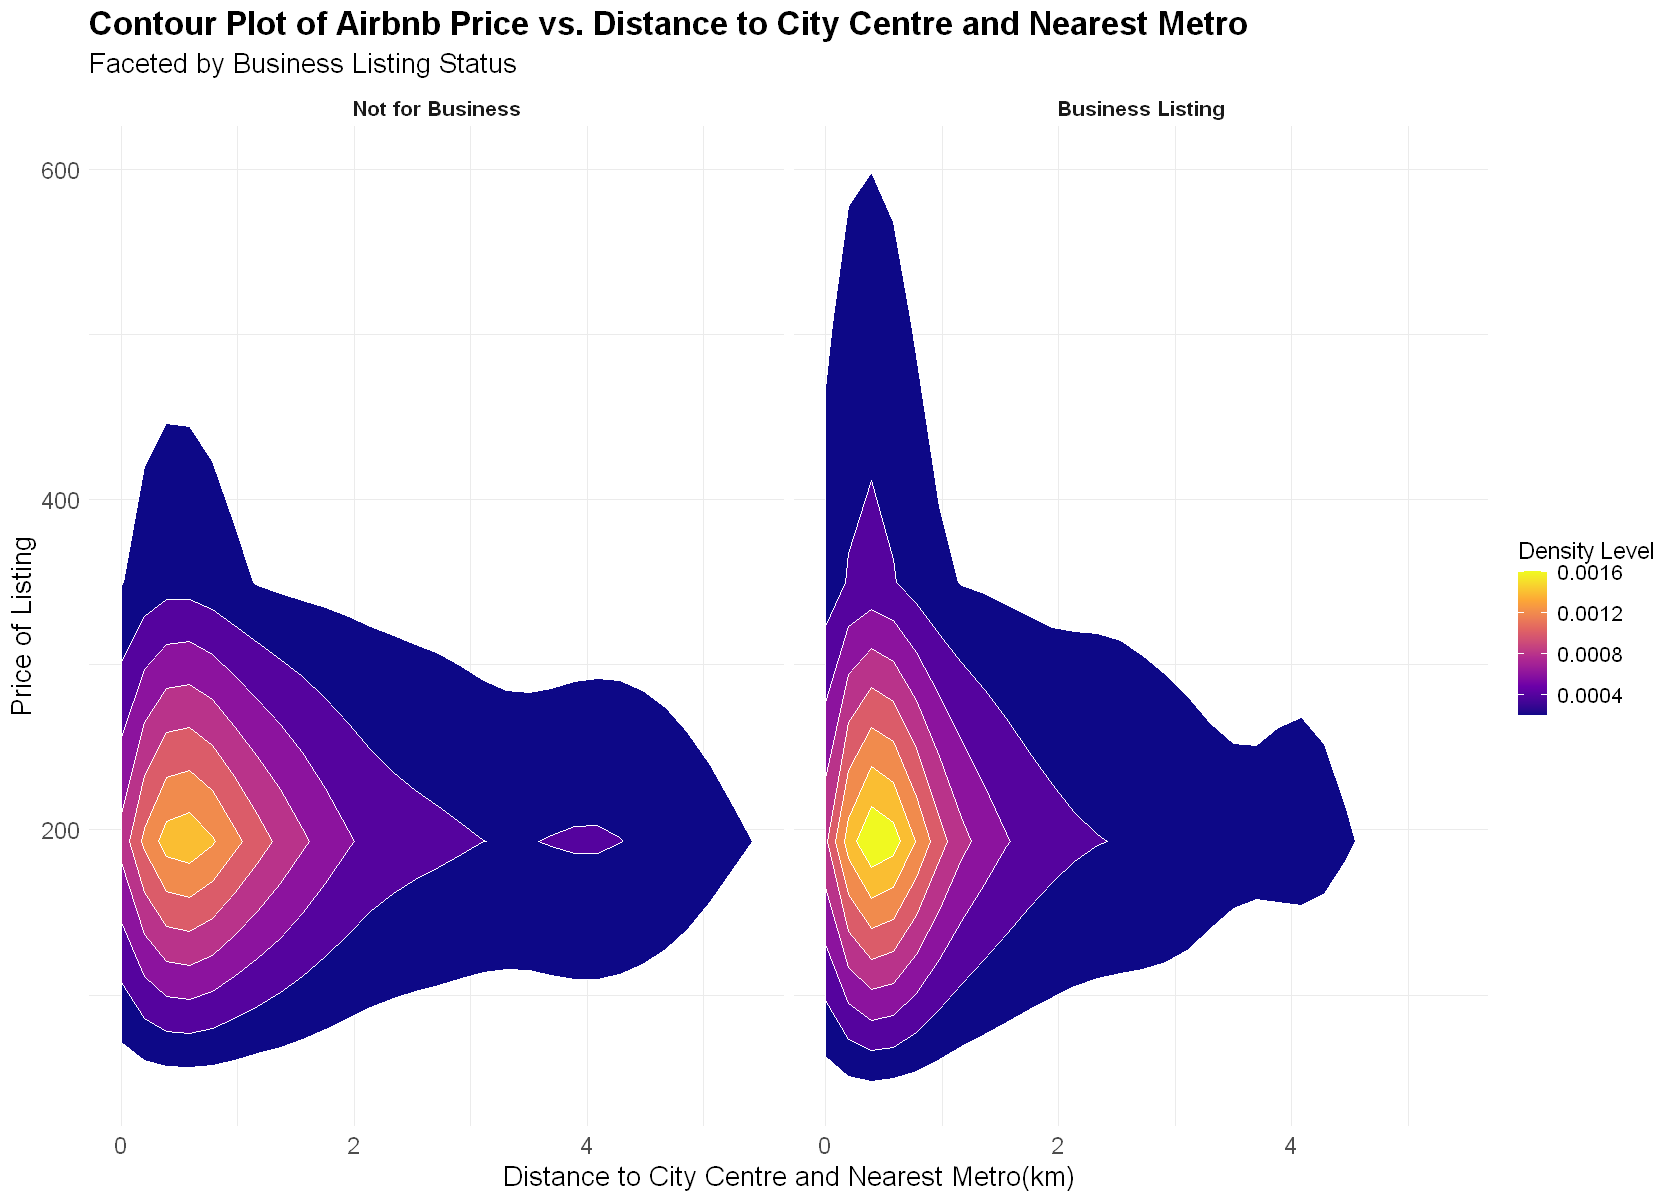

In [5]:
# code taken from Brian's assignment 2
# contour plot of price against distance from city centre and nearest metro station
options(repr.plot.width = 14, repr.plot.height = 10)

# combining dist and metro_dist into one variable
# code taken from Brian's assignment 2
airbnb_clean_long <- airbnb_training %>%
    dplyr::select(realSum, dist, metro_dist, city, bedrooms, biz) %>%
    mutate(realSum_shifted = if_else(realSum <= 0, 1, realSum)) %>%
    pivot_longer(
        cols = c(dist, metro_dist),
        names_to = "DistanceType",
        values_to = "Distance")

# plotting variables
ggplot(airbnb_clean_long, aes(x = Distance, y = realSum_shifted)) +
    stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", color = "white", contour = TRUE) +
    facet_wrap(~ biz, labeller = labeller(biz = c("0" = "Not for Business", "1" = "Business Listing"))) +
    scale_fill_viridis_c(option = "C", name = "Density Level") +
    labs(
        title = "Contour Plot of Airbnb Price vs. Distance to City Centre and Nearest Metro",
        subtitle = "Faceted by Business Listing Status",
        x = "Distance to City Centre and Nearest Metro(km)",
        y = "Price of Listing"
  ) +
    theme_minimal(base_size = 12) +
    theme(
        text = element_text(size = 16), 
        plot.title = element_text(size = 20, face = "bold"),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),  
        legend.title = element_text(size = 14),
        strip.text = element_text(face = "bold")
  )

#### Interpretation of contour plot

The contour plot reveals a tendency for listings closer to the city centre or a metro station to be more expensive, and that entire homes and private rooms are generally more expensive than shared rooms. However, most listings, regardless of distance or purpose, tend to fall within a similar price range. We also observe that entire homes or apartments listed on Airbnb are generally located closer to the city centre or metro stations and are priced higher on average.

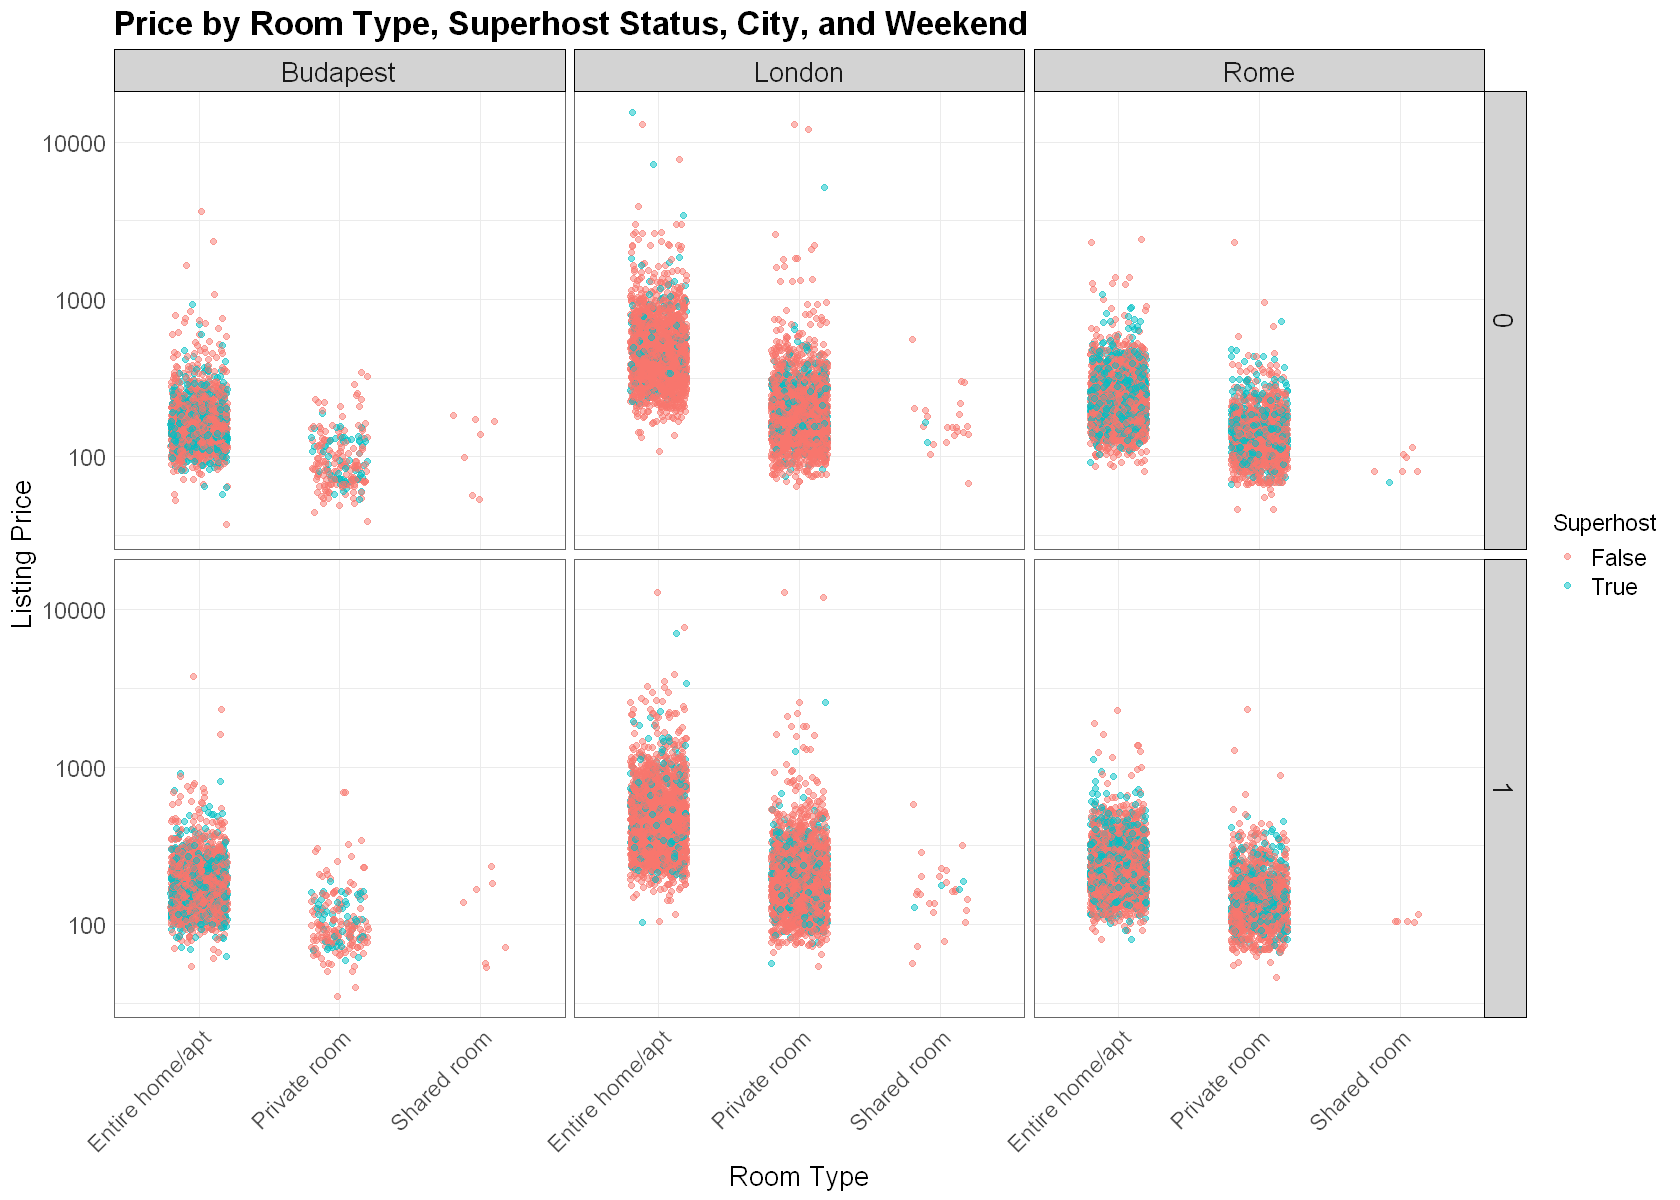

In [6]:
# code taken from Brian's assignment 2
options(repr.plot.width=25, repr.plot.height=10)

# Create bins for guest_satisfaction_overall
airbnb_train_binned <- airbnb_training %>%
  mutate(
    satis_bin = cut(guest_satisfaction_overall,
      breaks = c(0, 75, 80, 95, Inf),
      labels = c("Fair (0-75)","Average (75-80)","Good (80-95)", "Excellent (95-100)")
    )
  )

# Combine violin plot + boxplot, facet by city, log-scale on y-axis
ggplot(airbnb_train_binned, aes(x = satis_bin, y = realSum, fill = satis_bin)) +
    geom_violin(alpha = 0.4) +
    geom_boxplot(width = 0.15, outlier.alpha = 0.3, notch = TRUE) +
    facet_wrap(~ city) + 
    scale_y_log10() +
    labs(
        title = "Distribution of Listing Price by Overall Satisfaction Levels",
        subtitle = "Faceted by Purpose of Listing",
        x = "Binned Overall Satisfaction",
        y = "Price of Listing",
        fill = "Satisfaction Level"
    ) +
    theme_minimal() +
    theme(
        text = element_text(size = 16), 
        plot.title = element_text(size = 20, face = "bold"),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),  
        legend.title = element_text(size = 14),
        strip.text = element_text(face = "bold")
    )

#### Interpretation of violin boxplot
The chart suggests that higher overall ratings for Airbnb properties do not necessarily correspond to higher or lower listing prices. It is interesting to note that listings with lower overall ratings, however, usually have prices in the higher range, suggesting that higher price for a bad experience at an Airbnb could be a factor in the lower rating. We also observe that listings are more expensive in London, followed by Rome and Budapest. 

### Summary Tables


In [7]:
# summarizing the range of prices
airbnb_training %>%
  group_by(city) %>%
  summarise(
    min_price = min(realSum),
    max_price = max(realSum),
    mean_price = mean(realSum),
    sd_price = sd(realSum)
  ) %>%
  arrange(desc(mean_price))

city,min_price,max_price,mean_price,sd_price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
London,67.02886,15499.894,366.9309,546.2131
Rome,46.05709,2418.348,206.2775,115.8439
Budapest,37.12929,2330.216,176.2546,113.0089


From the range of prices, we can observe substantial variation in pricing across the three cities. This suggests that city-specific factors significantly influence Airbnb prices. For our analysis, it highlights the importance of incorporating `city` as a key variable in our model.

## C) Methods Plan
The response variable `realSum` is continuous with an unbounded range (at least for positive values) so we will use multiple linear regression to obtain a predictive model for the price of a listing. Since the dataset contains many predictors, interaction terms will not be considered in order to maintain model simplicity.

We will fit and compare multiple model selection methods and choose the model that provides the most predicitive power by minimizing the Root Mean Squared Error (RMSE). RMSE is well-suited to test prediction accuracy as it directly measures the average magnitude of prediction errors in the same units as the response variable. The model selection methods we will test are:
- Backward stepwise selection using `stepAIC()`
- LASSO Regression (L1 regularization)
- Ridge Regression (L2 regularization)

To validate the RMSE from each model and avoid the post-inference problem, the data will be split into three sets: a training set, a validation set, and a testing set. Since the dataset is very large (roughly 23,000 observations), splitting the data into a third set will still leave plenty of data for each set while making RMSE validation easier to implement (as opposed to performing cross-validation). 60% of the data will be used to train the models, 20% of the data will be used to calculate and compare RMSE's, and finally the remaining 20% to fit our selected model to test its predictive power. This will let us avoid the post-inference problem we could potentially run into while selecting variables and fitting the model on the same data. Since a temporary variable was needed to split the data, data splitting was performed as a part of the data cleaning process to avoid leaving unnecesasary variables in the dataset.

### Assumptions in the Model
In order to use the ordinary least square regression, we first have to make the following assumptions:

- **Linearity**: The relationship between the response and predictors is linear
- **Independence**: The residual errors are independent
- **Homoscedasticity**: The variance of residuals is constant across all levels of the predictors
- **Normality**: The conditional distribution of the residuals follows a Normal distribution
- **No multicollinearity**: There is not a strong correlation between two or more predictors

### Assessing Multicollinearity

In [8]:
# checking multicollinearity
options(repr.matrix.max.rows = 18)

# vif scores with all variables
pre_vif <- vif(lm(realSum ~., data = airbnb_training))
pre_vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.707711e+00,2,1.143151
person_capacity,2.154662e+00,1,1.467877
host_is_superhost,1.156291e+00,1,1.075310
multi,1.433791e+00,1,1.197410
biz,1.593605e+00,1,1.262381
cleanliness_rating,2.259058e+00,1,1.503016
guest_satisfaction_overall,2.338308e+00,1,1.529153
bedrooms,1.552736e+00,1,1.246088
dist,4.880644e+00,1,2.209218
metro_dist,2.186789e+00,1,1.478779


We will focus on the **GVIF^(1/(2*Df))** column to decide the variable selection process as our dataset contains multiple categorical variables. We observe that the values for `attr_index`, `attr_index_norm`, `rest_index`, `rest_index_norm`, `lng`, `lat`, and `city` are all greater than $\sqrt{5} \approx 2.23$. This makes intuitive sense, since both the longitude and latitude of a listing would depend highly on what city the listing is in. It also makes intuitive sense that `attr_index` and `attr_index_norm` are highly correlated, since `attr_index_norm` is just `attr_index` but normalized to force the minimum and maximum attraction index to be 0 and 100 respectively (Gyódi & Nawaro, 2021). A similar conclusion is reached for `rest_index` and `rest_index_norm`, since `rest_index_norm` is calculated from `rest_index` in the same way.

Since `stepAIC()` and LASSO are sensitive to multicollinearity, the following variables will be removed:
- `attr_index`: Since the generalized VIF of `attr_index` is greater than `attr_index_norm`, `attr_index` will be removed
- `rest_index`: Since the generalized VIF of `rest_index` is greater than `rest_index_norm`, `rest_index` will be removed
- `lng` and `lat`: We determined that city-specific factors are likely to be significant factors that determine the price of a listing, so it makes more sense to work with the categorical variable `city` than the numerical `lng` and `lat` variables

In [9]:
# removing raw variables as they have higher VIF scores than normalized variables
airbnb_training <- dplyr::select(airbnb_training, -c(attr_index, rest_index, lng, lat))
airbnb_validation <- dplyr::select(airbnb_validation, -c(attr_index, rest_index, lng, lat))
airbnb_testing <- dplyr::select(airbnb_testing, -c(attr_index, rest_index, lng, lat))

# vif scores without raw variables
post_vif <- vif(lm(realSum ~., data = airbnb_training))
post_vif

,GVIF,Df,GVIF^(1/(2*Df))
room_type,1.682548,2,1.138916
person_capacity,2.153721,1,1.467556
host_is_superhost,1.154421,1,1.074440
multi,1.433691,1,1.197368
biz,1.589253,1,1.260656
cleanliness_rating,2.256536,1,1.502177
guest_satisfaction_overall,2.335724,1,1.528307
bedrooms,1.552669,1,1.246061
dist,4.610271,1,2.147154
metro_dist,1.888696,1,1.374298


### Model Training

#### Stepwise Selection with stepAIC()

In [10]:
# code taken from Anthony's assignment 2
# full and null models, and training matrix
null_model <- lm(realSum ~ 1, data = airbnb_training)
full_model <- lm(realSum ~ ., data = airbnb_training)
training_matrix <- model.matrix(object = realSum ~ ., data = airbnb_training)[, -1]

In [11]:
# code taken from Anthony's assignment 2
# stepwise training - credit to Anthony
n <- nrow(airbnb_training)
stepwise_model <- stepAIC(full_model,
                          direction = "backward",
                          scope = list(lower = null_model, upper = full_model),
                          k = log(n), trace = 0)
summary(stepwise_model)


Call:
lm(formula = realSum ~ room_type + person_capacity + bedrooms + 
    metro_dist + attr_index_norm + rest_index_norm + city, data = airbnb_training)

Residuals:
    Min      1Q  Median      3Q     Max 
 -792.5   -87.0   -21.5    52.3 14381.6 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -53.1468    15.0138  -3.540 0.000402 ***
room_typePrivate room -126.1750     7.5484 -16.715  < 2e-16 ***
room_typeShared room  -171.8360    52.5426  -3.270 0.001077 ** 
person_capacity         18.1128     3.2296   5.608 2.08e-08 ***
bedrooms               104.9495     6.0998  17.205  < 2e-16 ***
metro_dist             -12.0428     3.1909  -3.774 0.000161 ***
attr_index_norm          9.1613     0.4444  20.617  < 2e-16 ***
rest_index_norm         -1.3377     0.3143  -4.256 2.10e-05 ***
cityLondon             160.7517    13.4252  11.974  < 2e-16 ***
cityRome                64.9518     8.9351   7.269 3.81e-13 ***
---
Signif. codes:  0 '***' 0.00

#### LASSO Regression

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -133.7709770
room_typePrivate room      -123.0342680
room_typeShared room       -156.3380596
person_capacity              18.5050730
host_is_superhostTrue        -7.6849123
multi                         .        
biz                           .        
cleanliness_rating            1.0050293
guest_satisfaction_overall    0.7825325
bedrooms                    103.3214324
dist                          .        
metro_dist                  -11.5493632
attr_index_norm               9.1489513
rest_index_norm              -1.3063590
cityLondon                  155.8786404
cityRome                     59.3749637
weekend                       7.2344938

[1] "The (log) lambda related to the minimum MSE in the LASSO model is -0.2500"

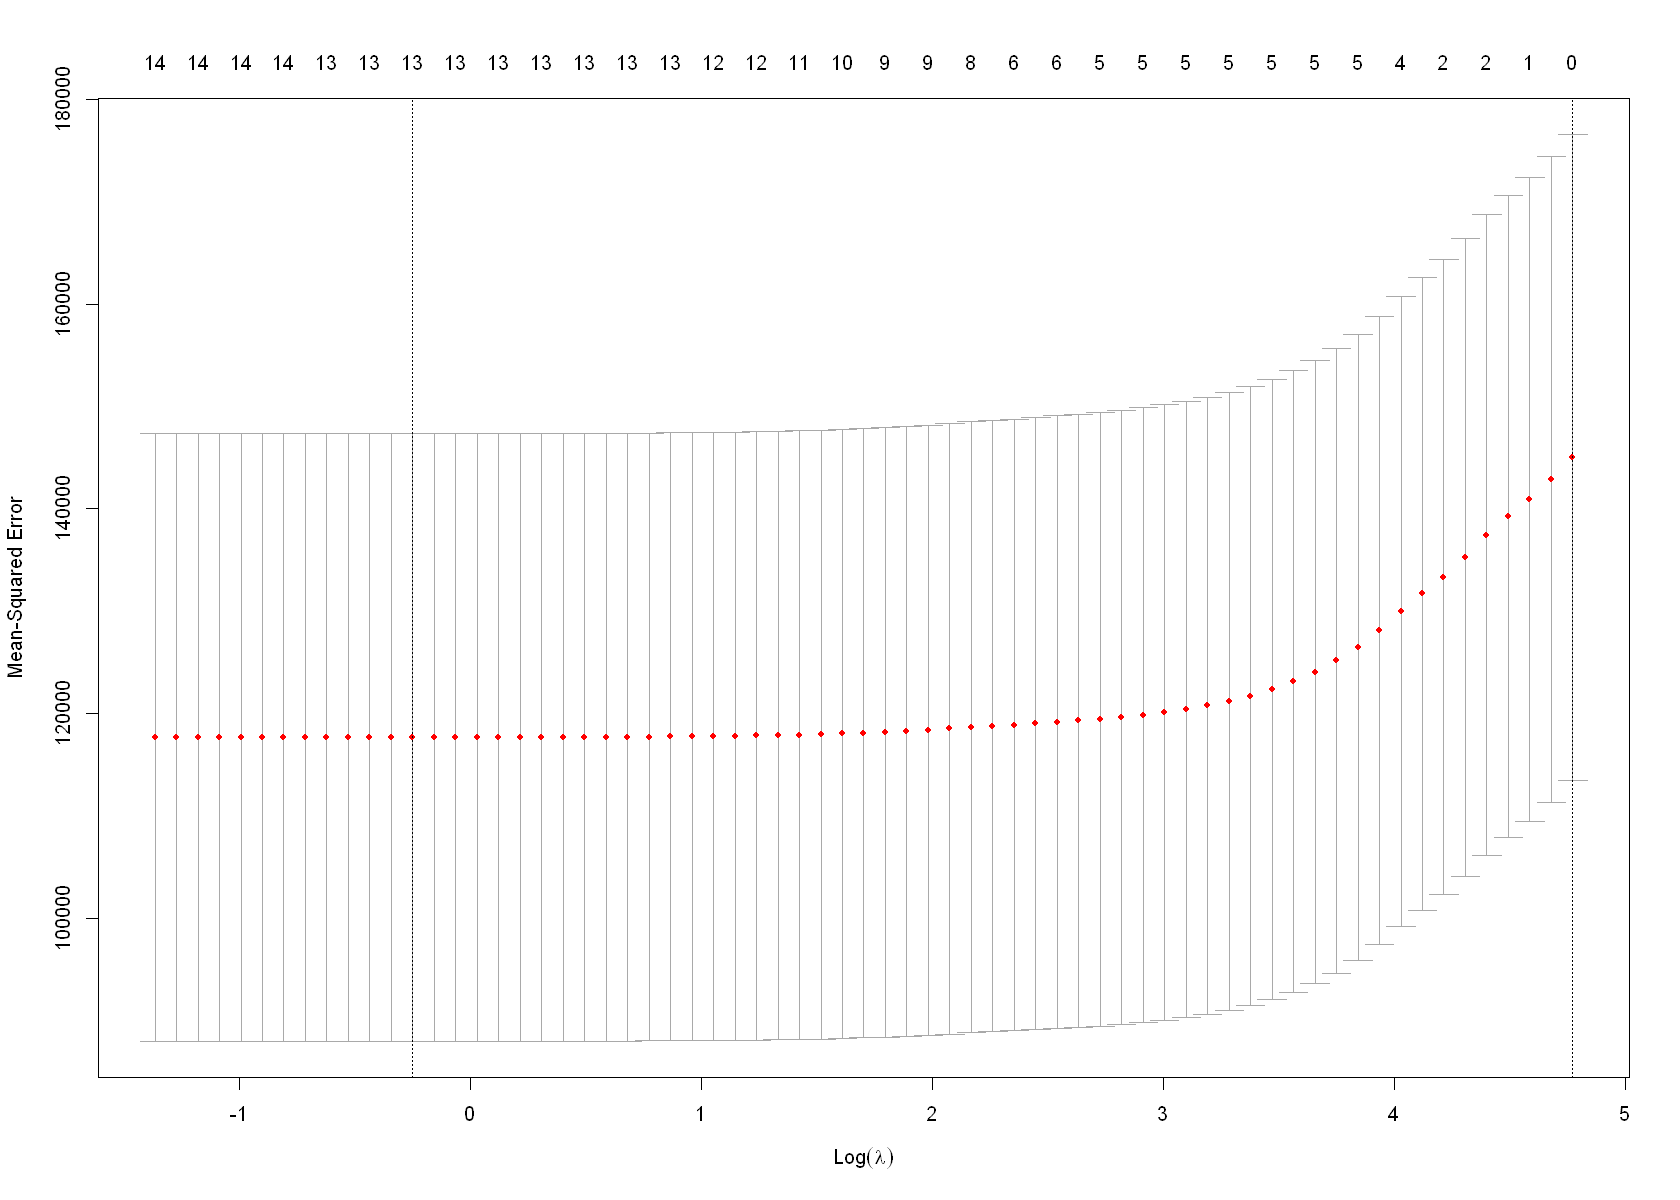

In [23]:
# LASSO training
lasso_model <- cv.glmnet(x = training_matrix, y = airbnb_training$realSum, alpha = 1)
coef(lasso_model, s = "lambda.min")
plot(lasso_model)
sprintf("The (log) lambda related to the minimum MSE in the LASSO model is %.4f", log(lasso_model$lambda.min))

#### Ridge Regression

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -136.3404254
room_typePrivate room      -118.2070324
room_typeShared room       -163.8599904
person_capacity              19.9317661
host_is_superhostTrue       -10.3792555
multi                        -1.7986375
biz                          -0.2052225
cleanliness_rating            1.9381975
guest_satisfaction_overall    0.7792359
bedrooms                    100.5885161
dist                          0.2474648
metro_dist                  -12.5034415
attr_index_norm               9.0320341
rest_index_norm              -1.3579503
cityLondon                  147.6247581
cityRome                     53.4419201
weekend                       8.8503011

[1] "The (log) lambda related to the minimum MSE in the Ridge model is 2.4713"

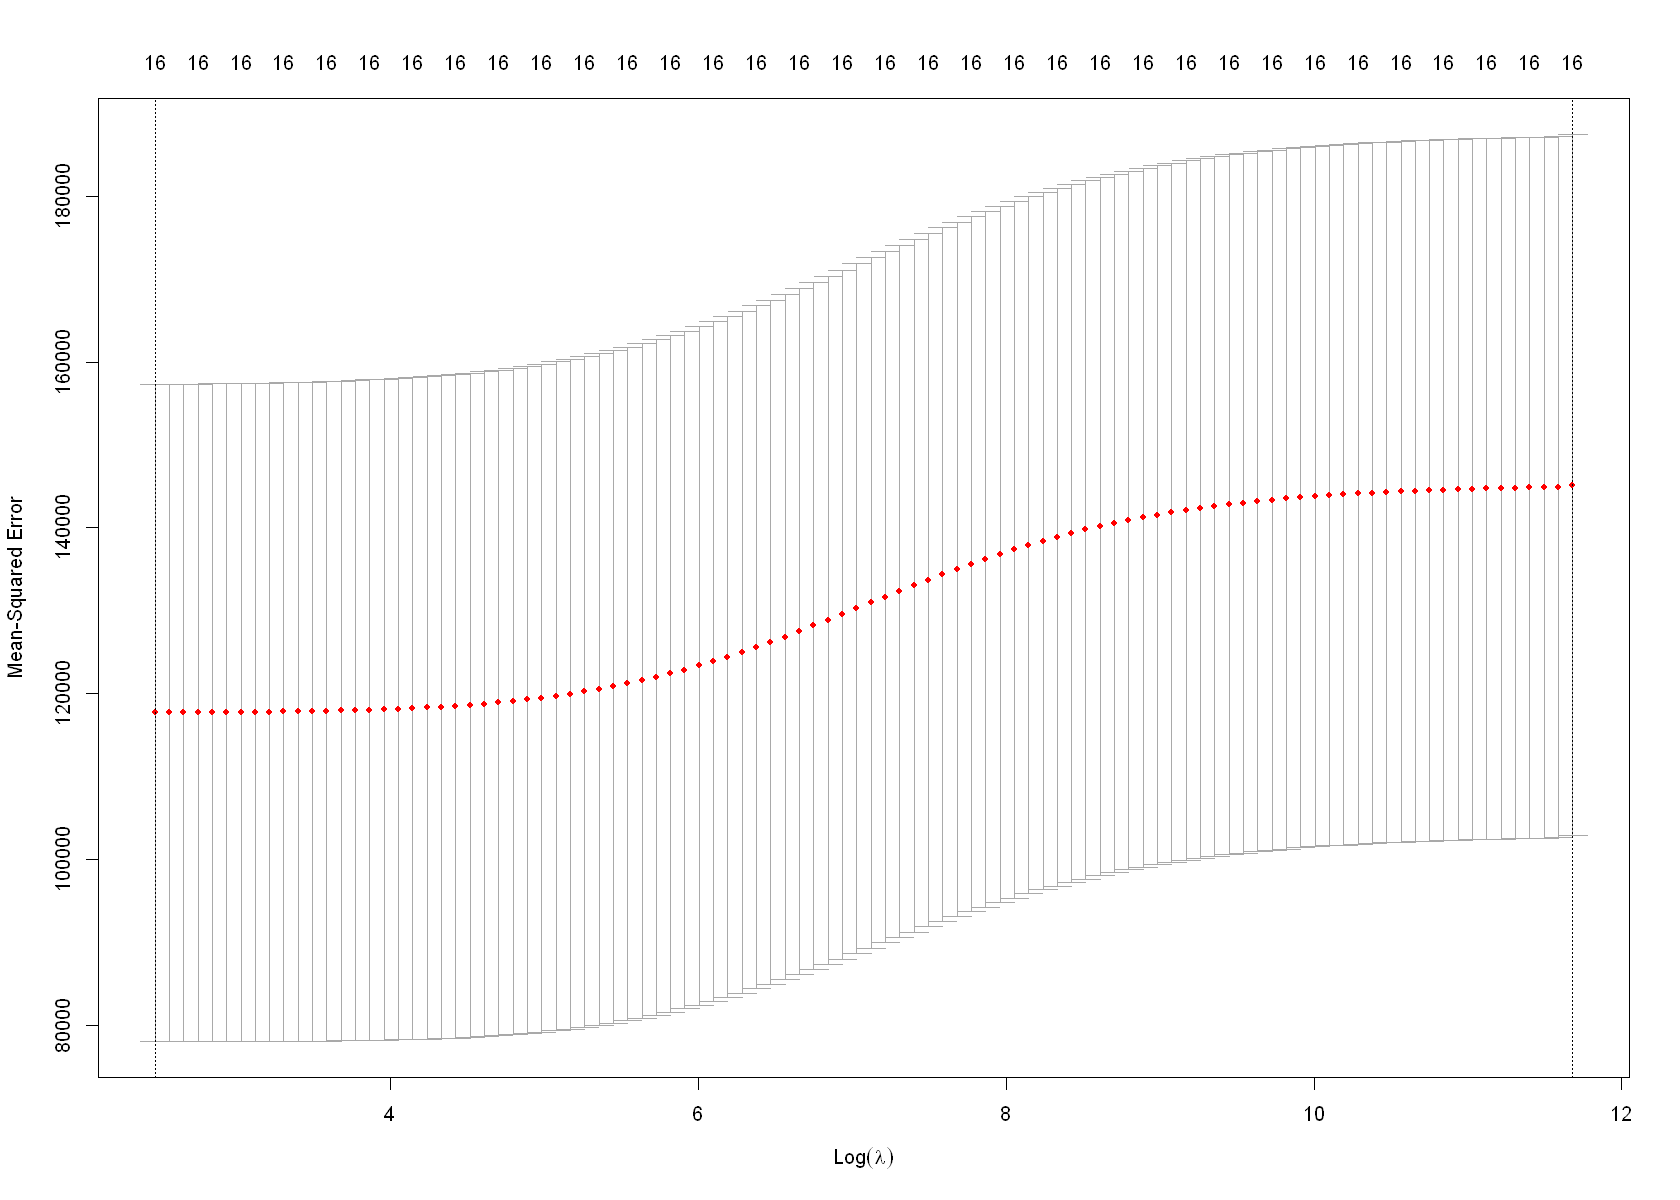

In [24]:
# ridge training
ridge_model <- cv.glmnet(x = training_matrix, y = airbnb_training$realSum, alpha = 0)
coef(ridge_model, s = "lambda.min")
plot(ridge_model)
sprintf("The (log) lambda related to the minimum MSE in the Ridge model is %.4f", log(ridge_model$lambda.min))

### Model Selection

In [25]:
# validation
validation_matrix <- model.matrix(object = realSum ~ ., data = airbnb_validation)[, -1]
stepwise_preds <- predict(stepwise_model, newdata = airbnb_validation)
lasso_preds <- predict(lasso_model, newx = validation_matrix, s = "lambda.min")
ridge_preds <- predict(ridge_model, newx = validation_matrix, s = "lambda.min")

validation_rmse <- tibble(
    Model = c("Multiple Linear Regression with Stepwise Selection", "LASSO Regression with Minimum MSE", "Ridge Regression with Minimum MSE"),
    RMSE = c(RMSE(stepwise_preds, airbnb_validation$realSum),
             RMSE(lasso_preds, airbnb_validation$realSum),
             RMSE(ridge_preds, airbnb_validation$realSum))
)

validation_rmse

Model,RMSE
<chr>,<dbl>
Multiple Linear Regression with Stepwise Selection,197.2752
LASSO Regression with Minimum MSE,197.1208
Ridge Regression with Minimum MSE,196.9571


After evaluating the performance of three regression models on the validation set using RMSE, we find that while all models performed similarly, Ridge regression achieved the lowest RMSE (196.96), followed closely by LASSO regression (197.11) and stepwise selection (197.28). Since the validation set is fairly large, the small differences in RMSE between the three models are unlikely to be a result of random chance. This suggests that Ridge regularization has performs slightly bettwe compared to the other two methods, so we will select the Ridge regression model.

### Fitting the Ridge Model on Testing Data
Now that we've selected the Ridge model, we will fit it on testing data and evaluate its performance.

In [26]:
# preparing testing data in matrix format
test_matrix <- model.matrix(realSum ~ ., data = airbnb_testing)[, -1]

# fitting ridge model on testing data
ridge_test_preds <- predict(ridge_model, newx = test_matrix, s = "lambda.min")

In [30]:
# evaluating performance of the ridge model
ridge_test_rmse <- RMSE(ridge_test_preds, airbnb_testing$realSum)
sprintf("The RMSE of the model is %.4f", ridge_test_rmse)

[1] "The RMSE of the model is 198.2848"

In [31]:
# visualizing ridge coefficients again
coef(ridge_model, s = "lambda.min")

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s1
(Intercept)                -136.3404254
room_typePrivate room      -118.2070324
room_typeShared room       -163.8599904
person_capacity              19.9317661
host_is_superhostTrue       -10.3792555
multi                        -1.7986375
biz                          -0.2052225
cleanliness_rating            1.9381975
guest_satisfaction_overall    0.7792359
bedrooms                    100.5885161
dist                          0.2474648
metro_dist                  -12.5034415
attr_index_norm               9.0320341
rest_index_norm              -1.3579503
cityLondon                  147.6247581
cityRome                     53.4419201
weekend                       8.8503011

# 4. Discussion
The Ridge regression model, used to predict Airbnb listing prices in Budapest, London, and Rome, showed an RMSE of $198.20$ on the test set and $196.96$ on the validation set—indicating **strong generalizability to out-of-sample data**.

Interpreting key coefficients:
- `cityLondon` (147.62) and `cityRome` (53.44) are dummy variables comparing each city to Budapest (the reference category). Their positive coefficients suggest listings are more expensive in London than in Rome than in Budapest, likely due to greater demand in those markets.
- `room_typePrivate room` (-118.21) and `room_typeShared room` (-163.86) are dummy variables comparing different room types to entire home listings. The negative coefficients indicate private rooms, followed by shared rooms, are significantly cheaper than entire homes, likely due to fewer amenities and space.
- `person_capacity` (19.93) indicates that larger listings that typically host more people offer more space or amenities and can charge higher prices.
- `metro_dist` (-12.50) suggests that prices drop the farther a listing is from the nearest metro station, aligning with earlier findings that central locations command higher prices.
- `attr_index_norm` (9.03) has a modest positive effect, indicating listings closer to attractions can charge slightly higher prices, though the impact is not as strong as metro access.
- `dist` (0.25) and `rest_index_norm` (-1.36) have a surprisingly low effect on prices, implying that overall distance from the city center and nearby restaurant density may be less influential than direct access to transit, or that their effects are already captured by other, more dominant location variables. 
- `host_is_superhostTrue` (-10.38) is another dummy variable comparing the listing prices of SuperHosts to regular hosts. This is unexpectedly negative, possibly reflect SuperHosts setting more competitive prices to maintain high occupancy and meet performance standards. It could also suggest market saturation, where the abundance of SuperHosts reduces the price premium usually linked to their status.
- `weekend` (8.86) shows a modest price increase during weekends, suggesting somewhat consistent pricing across weekdays and weekends.
- `guest_satisfaction_overall` (0.78), `cleanliness_rating` (1.94), `multi` (-1.80), `biz` (-0.21) have small positive effects, implying these factors matter less in predicting prices.

Overall, city and type of room are the most influential variables. Since we have observed in our analysis that the relationship of price with other characteristics of the listing changes for every city, we could look into interactions to further improve the model.

Future research could examine seasonal trends to understand how demand fluctuations affect pricing. This could reveal periods of peak profitability, influence hosts’ pricing strategies, and highlight how tourism cycles shape the dynamics of the local hotel industry and the rental market.

# 5. References
Barron, K., Kung, E., & Proserpio, D. (2019). *When Airbnb Listings in a City Increase, So Do Rent Prices.* Harvard Business Review. https://ci.carmel.ca.us/sites/main/files/file-attachments/harvard_business_article_and_study.pdf

Deboosere, R., Kerrigan, D. J., Wachsmuth, D., & El-Geneidy, A. (2019). *Location, location and professionalization: a multilevel hedonic analysis of Airbnb listing prices and revenue.* Regional Studies, Regional Science, 6(1), 143–156. https://doi.org/10.1080/21681376.2019.1592699

Gyódi, K., & Nawaro Ł. (2021). *Determinants of Airbnb prices in European cities: A spatial econometrics approach*. https://doi.org/10.1016/j.tourman.2021.104319